## Blending and pasting images
Blending images is done through addWeighted function that uses images and combines them

### new_pixel =  alpha * pixel_1 + beta * pixel_2 + gamma

In [1]:
import cv2 as cv

In [16]:
img1 = cv.imread('C:\\Users\\tushi\\Downloads\\images\\hhh.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('C:\\Users\\tushi\\Downloads\\images\\cig.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

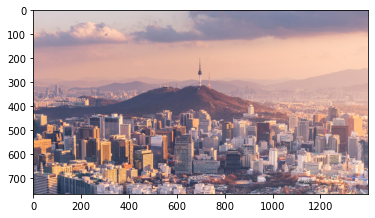

In [18]:
plt.imshow(img1)

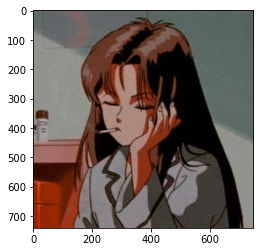

In [19]:
plt.imshow(img2)

In [20]:
img1.shape

(768, 1400, 3)

In [21]:
img2.shape

(741, 750, 3)

## Blending images of the same size

In [22]:
img1 =  cv.resize(img1, (700,700))
img2 =  cv.resize(img2, (700,700))

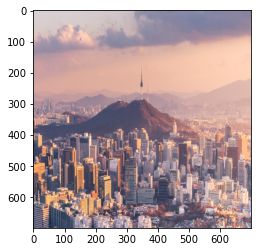

In [23]:
plt.imshow(img1)

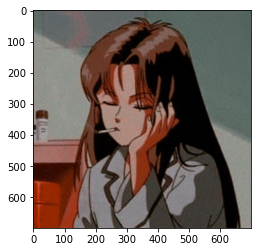

In [24]:
plt.imshow(img2)

In [25]:
blended = cv.addWeighted(src1=img1, alpha=0.5, src2=img2, beta=0.5, gamma=0)

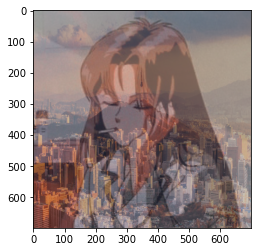

In [26]:
plt.imshow(blended)

In [28]:
blended = cv.addWeighted(src1=img1, alpha=0.2, src2=img2, beta=0.8, gamma=0)

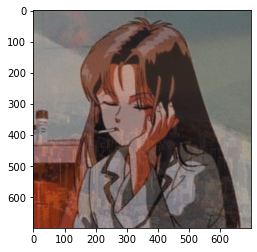

In [29]:
plt.imshow(blended)

## Blending images of different sizes
#Overlay small image on top of a larger one
#Numpy reassignment

In [30]:
img1 = cv.imread('C:\\Users\\tushi\\Downloads\\images\\hhh.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('C:\\Users\\tushi\\Downloads\\images\\cig.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

In [31]:
img2 = cv.resize(img2, (600,600))

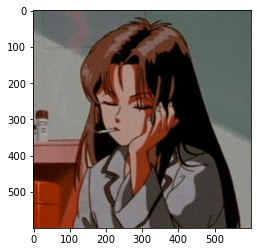

In [32]:
plt.imshow(img2)

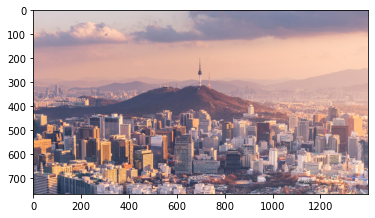

In [33]:
plt.imshow(img1)

In [34]:
large_img = img1
small_img = img2

In [35]:
x_offset = 0
y_offset = 0

In [36]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [37]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

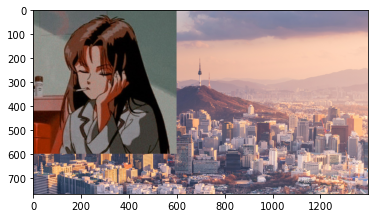

In [38]:
plt.imshow(large_img)

## Blending images of different sizes

In [77]:
img1 = cv.imread('C:\\Users\\tushi\\Downloads\\images\\hhh.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('C:\\Users\\tushi\\Downloads\\images\\dont.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

In [78]:
img2 = cv.resize(img2, (600,600))

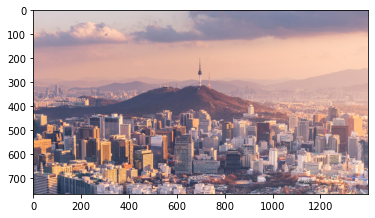

In [79]:
plt.imshow(img1)

In [80]:
#creating a region of interest
img1.shape

(768, 1400, 3)

In [81]:
x_offset = 1400-600
y_offset = 768-600

In [82]:
img2.shape

(600, 600, 3)

In [83]:
rows,cols,channels = img2.shape

In [84]:
roi = img1[y_offset:768,x_offset:1400]

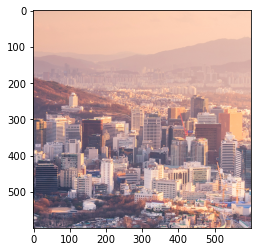

In [85]:
plt.imshow(roi)

In [86]:
img2gray = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)

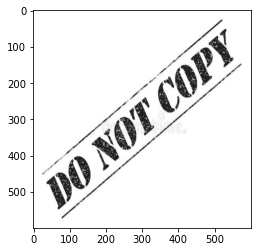

In [87]:
plt.imshow(img2gray, cmap='gray')

In [88]:
mask_inv = cv.bitwise_not(img2gray)

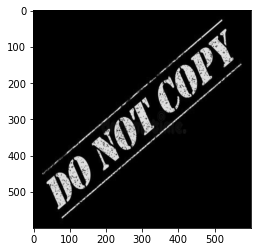

In [89]:
plt.imshow(mask_inv, cmap='gray')

In [90]:
import numpy as np

In [91]:
white_background = np.full(img2.shape, 255, dtype = np.uint8)

In [92]:
white_background.shape

(600, 600, 3)

In [93]:
white_background

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [94]:
bk = cv.bitwise_or(white_background,white_background,mask=mask_inv)

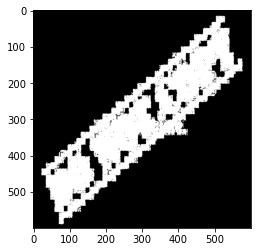

In [95]:
plt.imshow(bk)

In [96]:
fg = cv.bitwise_or(img2, img2, mask=mask_inv)

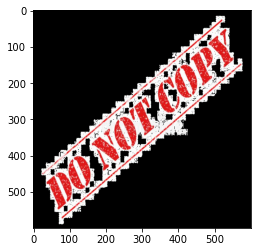

In [97]:
plt.imshow(fg)

In [98]:
final_roi = cv.bitwise_or(roi,fg)

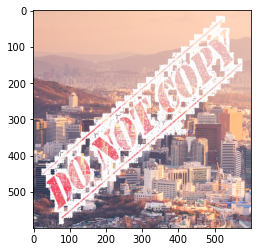

In [99]:
plt.imshow(final_roi)

In [100]:
large_img = img1
small_img = final_roi

In [101]:
small_img.shape

(600, 600, 3)

In [102]:
large_img[y_offset: y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img

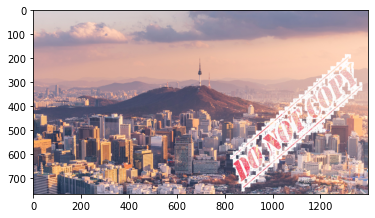

In [103]:
plt.imshow(large_img)